In [381]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [431]:
y_train = pd.read_csv("Y_0.csv")
y_train = y_train["mort_icu"]
y_train_one = pd.read_csv("Y_1.csv")
y_train_one = y_train_one["mort_icu"]

#y_valid = pd.read_csv("Y_0 valid.csv")
#y_valid = y_valid["mort_icu"]
#y_valid_one = pd.read_csv("Y_1 valid.csv")
#y_valid_one = y_valid_one["mort_icu"]

X_train = pd.read_csv("Y_0 X.csv")
X_train = X_train.dropna(axis = 1)
X_train_one = pd.read_csv("Y_1 X.csv")
X_train_one = X_train_one.dropna(axis = 1)

#X_valid = pd.read_csv("Y_0 X valid.csv")
#X_valid = X_valid.dropna(axis = 1)
#X_valid_one = pd.read_csv("Y_1 X valid.csv")
#X_valid_one = X_valid_one.dropna(axis = 1)

#X_train = X_train.append(X_valid)
#X_train_one = X_train_one.append(X_valid_one)
#y_train = y_train.append(y_valid)
#y_train_one = y_train_one.append(y_valid_one)

X_valid = pd.read_csv("X_valid_new.csv")
X_valid = X_valid.dropna(axis = 1)
y_valid = pd.read_csv("Y_valid.csv")
y_valid = y_valid["mort_icu"]

In [432]:
#X_test = pd.read_csv("X_test_new.csv")
#X_test = X_test.dropna(axis = 1)

In [433]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train, y_train, test_size=1/6, random_state=1)

In [434]:
X_train_1, X_train_3, y_train_1, y_train_3 = train_test_split(X_train_1, y_train_1, test_size=1/5, random_state=1)

In [435]:
X_train_1, X_train_4, y_train_1, y_train_4 = train_test_split(X_train_1, y_train_1, test_size=1/4, random_state=1)

In [436]:
X_train_1, X_train_5, y_train_1, y_train_5 = train_test_split(X_train_1, y_train_1, test_size=1/3, random_state=1)

In [437]:
X_train_1, X_train_6, y_train_1, y_train_6 = train_test_split(X_train_1, y_train_1, test_size=1/2, random_state=1)

In [438]:
X_train_1 = X_train_1.append(X_train_one)
X_train_2 = X_train_2.append(X_train_one)
X_train_3 = X_train_3.append(X_train_one)
X_train_4 = X_train_4.append(X_train_one)
X_train_5 = X_train_5.append(X_train_one)
X_train_6 = X_train_6.append(X_train_one)

y_train_1 = y_train_1.append(y_train_one)
y_train_2 = y_train_2.append(y_train_one)
y_train_3 = y_train_3.append(y_train_one)
y_train_4 = y_train_4.append(y_train_one)
y_train_5 = y_train_5.append(y_train_one)
y_train_6 = y_train_6.append(y_train_one)

In [439]:
len(X_train_1)

3814

In [447]:
gbc = GradientBoostingClassifier(n_estimators=350,learning_rate=0.2, min_samples_leaf=120,min_samples_split=433, max_depth=10,max_features='sqrt',random_state=10)
gbc.fit(X_train_1, y_train_1)
y_valid_scores1 = gbc.predict_proba(X_valid)[:, 1]

gbc.fit(X_train_2, y_train_2)
y_valid_scores2 = gbc.predict_proba(X_valid)[:, 1]

gbc.fit(X_train_3, y_train_3)
y_valid_scores3 = gbc.predict_proba(X_valid)[:, 1]

gbc.fit(X_train_4, y_train_4)
y_valid_scores4 = gbc.predict_proba(X_valid)[:, 1]

gbc.fit(X_train_5, y_train_5)
y_valid_scores5 = gbc.predict_proba(X_valid)[:, 1]

gbc.fit(X_train_6, y_train_6)
y_valid_scores6 = gbc.predict_proba(X_valid)[:, 1]

In [448]:
y_valid_scores = []
for i in range(len(y_valid_scores1)):
    y_valid_scores.append((y_valid_scores1[i] + y_valid_scores2[i] + y_valid_scores3[i] + y_valid_scores4[i] + y_valid_scores5[i] + y_valid_scores6[i]) / 6)

<function matplotlib.pyplot.show(close=None, block=None)>

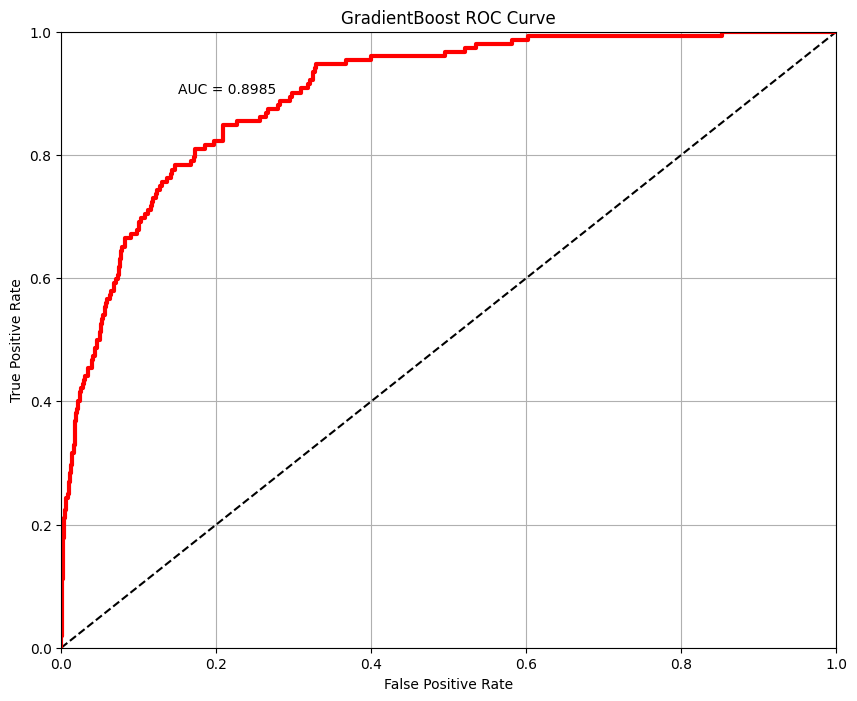

In [449]:
fpr, tpr, threshold = roc_curve(y_valid, y_valid_scores)
auc_valid = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, "r", linewidth=3)
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GradientBoost ROC Curve")
plt.xlim(0,1)
plt.ylim(0,1)
plt.text(0.15, 0.9, "AUC = " + str (round (auc_valid, 4)))
plt.show

In [ ]:
learning rate 0.05: 0.894
learning rate 0.05, n_estimator 700, min_sample_split 1100: 0.8954
learning rate 0.05, n_estimator 700, min_sample_split 433, min_sample_leaf 70: 0.8969
learning rate 0.05, n_estimator 700, min_sample_split 433, min_sample_leaf 90: 0.8976
learning rate 0.05, n_estimator 700, min_sample_split 433, min_sample_leaf 100: 0.8993
learning rate 0.05, n_estimator 700, min_sample_split 433, min_sample_leaf 110: 0.9000
learning rate 0.05, n_estimator 700, min_sample_split 433, min_sample_leaf 120, depth 12: 0.9004 
350 0.9027
350 0.1 433 0.8973

In [ ]:
random state 10